The data used for this project have been taken from the Australian Bureau of Statistics. One is on retail turnover for industries and the other one is on demographic statistics.

## Business Task

You are a data scientist working for an Australian retail chain operating in the clothing a retailing industry.

To date the company has only been running operations in New South Wales which is a state in Australia.

However the board of directors is considering an expansion into one of the following three states:
* Queensland
* Victoria
* Western Australia

You have been asked to assess the business environments for the industry in question in each of these three states and present your findings to the board of directors in person.



In [1]:

library(tidyverse)
library(caTools)
library(readxl)
library(scales)


competitors <- read.csv("../input/forecasting-clothing-retail-industry/Competitor-Research.csv")
demographics <- read_xlsx("../input/forecasting-clothing-retail-industry/Australian-Demographic-Statistics.xlsx")
turnover <- read_xlsx("../input/forecasting-clothing-retail-industry/Retail-Turnover-State-by-Industry-Subgroup2.xlsx")




── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




### Competitors Data 

First we will analyze the data from the competitors table.

In [2]:
head(competitors)


,Company,QLD,WA,VIC,NSW
,<fct>,<fct>,<fct>,<fct>,<fct>
1,Competitor 1,4.57%,4.18%,7.90%,8.54%
2,Competitor 2,2.60%,1.88%,8.99%,9.23%
3,Competitor 3,2.26%,7.48%,6.71%,7.84%
4,Competitor 4,6.47%,6.70%,7.94%,9.89%
5,Competitor 5,6.82%,1.17%,8.54%,5.67%
6,Competitor 6,4.68%,6.44%,6.52%,3.03%


Pivot competitors table to a more machine friendly format.


In [3]:
competitorl <- pivot_longer(competitors,cols = c(QLD, WA, VIC, NSW), names_to = "state", values_to = "net_profit_margins")

head(competitorl)

Company,state,net_profit_margins
<fct>,<chr>,<fct>
Competitor 1,QLD,4.57%
Competitor 1,WA,4.18%
Competitor 1,VIC,7.90%
Competitor 1,NSW,8.54%
Competitor 2,QLD,2.60%
Competitor 2,WA,1.88%


Remove unwanted characters and transform character to numeric type.

In [4]:
competitorl$net_profit_margins <- str_remove(competitorl$net_profit_margins,"[%]")

competitorl$net_profit_margins <- as.numeric(competitorl$net_profit_margins)

head(competitorl)

Company,state,net_profit_margins
<fct>,<chr>,<dbl>
Competitor 1,QLD,4.57
Competitor 1,WA,4.18
Competitor 1,VIC,7.90
Competitor 1,NSW,8.54
Competitor 2,QLD,2.60
Competitor 2,WA,1.88


Create Boxplot to have better insights on our competitors and determined states with best potential.

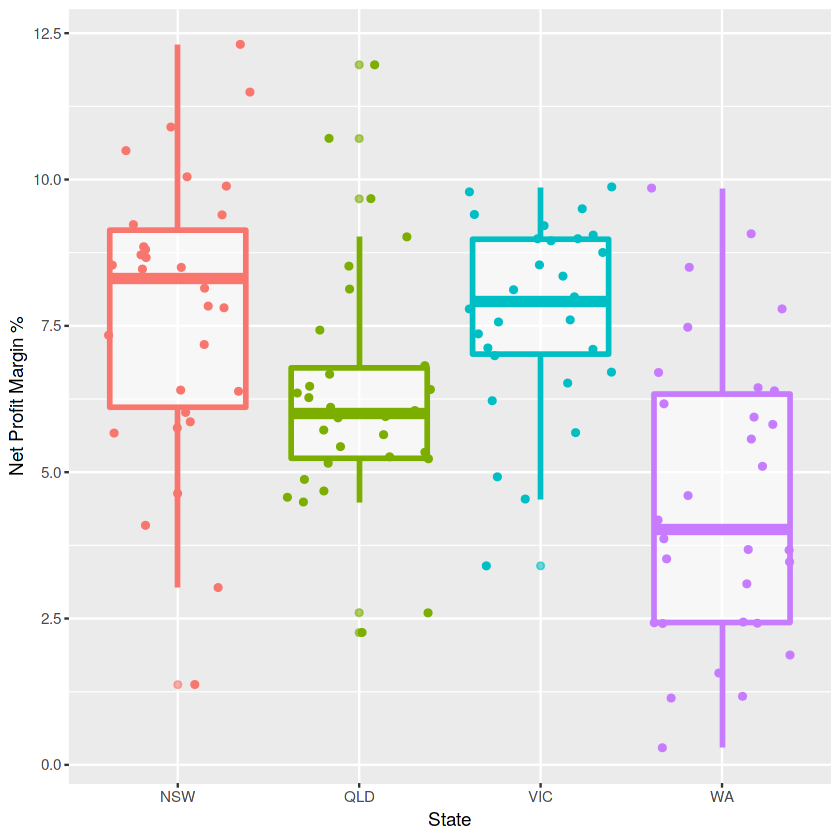

In [5]:
boxplot <- ggplot(competitorl, aes(x = state, y = net_profit_margins, color = state)) + 
  geom_boxplot(size=1.2, alpha=.6) + 
  geom_jitter() +
  xlab("State") + ylab("Net Profit Margin %") +
  theme(legend.position = "none")

boxplot

Based on this early analysis the state of Victoria seems the most attractive to expand into as it has the highest net profit margin % median between the three states.

### Turnover Data

In this section we clean, fliter, and analyze the data from the turnover table


In [6]:
head(turnover)

Date,Turnover ; New South Wales ; Supermarket and grocery stores ;,Turnover ; New South Wales ; Liquor retailing ;,Turnover ; New South Wales ; Other specialised food retailing ;,Turnover ; New South Wales ; Food retailing ;,"Turnover ; New South Wales ; Furniture, floor coverings, houseware and textile goods retailing ;",Turnover ; New South Wales ; Electrical and electronic goods retailing ;,"Turnover ; New South Wales ; Hardware, building and garden supplies retailing ;",Turnover ; New South Wales ; Household goods retailing ;,Turnover ; New South Wales ; Clothing retailing ;,⋯,Turnover ; Total (State) ; Department stores ;,Turnover ; Total (State) ; Newspaper and book retailing ;,Turnover ; Total (State) ; Other recreational goods retailing ;,"Turnover ; Total (State) ; Pharmaceutical, cosmetic and toiletry goods retailing ;",Turnover ; Total (State) ; Other retailing n.e.c. ;,Turnover ; Total (State) ; Other retailing ;,"Turnover ; Total (State) ; Cafes, restaurants and catering services ;",Turnover ; Total (State) ; Takeaway food services ;,"Turnover ; Total (State) ; Cafes, restaurants and takeaway food services ;",Turnover ; Total (State) ; Total (Industry) ;
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1982-04-01,303.1,41.7,63.9,408.7,65.8,91.8,53.6,211.3,94.0,⋯,460.1,135.1,64.9,125.6,153.5,479.1,146.3,196.1,342.4,3396.4
1982-05-01,297.8,43.1,64.0,404.9,65.8,102.6,55.4,223.8,105.7,⋯,502.6,134.9,67.7,128.7,154.8,486.1,145.5,196.6,342.1,3497.9
1982-06-01,298.0,40.3,62.7,401.0,62.3,105.0,48.4,215.7,95.1,⋯,443.8,128.2,65.5,125.0,148.8,467.5,140.2,188.5,328.7,3357.8
1982-07-01,307.9,40.9,65.6,414.4,68.2,106.0,52.1,226.3,95.3,⋯,459.1,129.9,68.5,136.6,156.1,491.1,146.5,192.0,338.5,3486.8
1982-08-01,299.2,42.1,62.6,403.8,66.0,96.9,54.2,217.1,82.8,⋯,438.4,133.0,65.2,134.7,152.8,485.7,138.8,192.7,331.5,3355.9
1982-09-01,305.4,42.0,64.4,411.8,62.3,97.5,53.6,213.4,89.4,⋯,465.1,135.5,66.8,130.4,157.2,489.9,144.3,197.6,341.9,3454.3


Filter retail turnover data to show only data starting from 2000

In [7]:
turnover <- turnover %>%
  filter(Date>= as.Date("2000-01-01"))

head(turnover)

Date,Turnover ; New South Wales ; Supermarket and grocery stores ;,Turnover ; New South Wales ; Liquor retailing ;,Turnover ; New South Wales ; Other specialised food retailing ;,Turnover ; New South Wales ; Food retailing ;,"Turnover ; New South Wales ; Furniture, floor coverings, houseware and textile goods retailing ;",Turnover ; New South Wales ; Electrical and electronic goods retailing ;,"Turnover ; New South Wales ; Hardware, building and garden supplies retailing ;",Turnover ; New South Wales ; Household goods retailing ;,Turnover ; New South Wales ; Clothing retailing ;,⋯,Turnover ; Total (State) ; Department stores ;,Turnover ; Total (State) ; Newspaper and book retailing ;,Turnover ; Total (State) ; Other recreational goods retailing ;,"Turnover ; Total (State) ; Pharmaceutical, cosmetic and toiletry goods retailing ;",Turnover ; Total (State) ; Other retailing n.e.c. ;,Turnover ; Total (State) ; Other retailing ;,"Turnover ; Total (State) ; Cafes, restaurants and catering services ;",Turnover ; Total (State) ; Takeaway food services ;,"Turnover ; Total (State) ; Cafes, restaurants and takeaway food services ;",Turnover ; Total (State) ; Total (Industry) ;
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2000-01-01,1130.1,96.8,185.8,1412.7,175.9,217.3,169.7,562.9,212.8,⋯,924.9,263.8,250.7,408.4,573.7,1496.6,737.6,559.8,1297.4,10794.2
2000-02-01,1072.7,94.9,183.1,1350.8,177.1,221.5,163.2,561.7,172.9,⋯,798.2,271.7,224.8,410.0,555.6,1462.1,713.4,493.3,1206.7,10114.8
2000-03-01,1145.4,97.5,186.9,1429.8,189.5,225.1,167.6,582.3,215.3,⋯,901.9,285.2,236.4,450.2,581.2,1553.0,785.1,539.6,1324.6,10930.1
2000-04-01,1099.2,101.0,176.9,1377.0,173.7,205.4,148.7,527.9,218.5,⋯,1024.7,244.0,233.7,434.2,570.9,1482.8,713.4,539.0,1252.5,10609.9
2000-05-01,1099.9,97.7,172.2,1369.8,192.0,250.8,161.4,604.2,241.7,⋯,1052.3,264.9,240.7,464.7,605.5,1575.8,742.7,539.4,1282.1,11052.7
2000-06-01,1090.3,106.2,176.8,1373.3,244.1,301.9,188.5,734.5,269.0,⋯,1165.5,251.2,267.5,471.7,619.3,1609.6,742.5,532.2,1274.7,11675.2


Pivot turnover table to a more machine friendly format.

In [8]:
turnover <- pivot_longer(turnover, cols = starts_with("Turnover"), values_to = "turnover_$m")


Seperate Columns.

In [9]:
turnover <- separate(turnover, name, into = c('Turnover','State','Industry'), sep = ';')

turnover <- subset(turnover, select = -c(Turnover))

head(turnover)

Warning message:
“Expected 3 pieces. Additional pieces discarded in 35532 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


Date,State,Industry,turnover_$m
<dttm>,<chr>,<chr>,<dbl>
2000-01-01,New South Wales,Supermarket and grocery stores,1130.1
2000-01-01,New South Wales,Liquor retailing,96.8
2000-01-01,New South Wales,Other specialised food retailing,185.8
2000-01-01,New South Wales,Food retailing,1412.7
2000-01-01,New South Wales,"Furniture, floor coverings, houseware and textile goods retailing",175.9
2000-01-01,New South Wales,Electrical and electronic goods retailing,217.3


Filter to see clothing retail industry only.

In [10]:
turnoverfinal <- turnover %>%
  filter(Industry == " Clothing retailing ")

head(turnoverfinal)

Date,State,Industry,turnover_$m
<dttm>,<chr>,<chr>,<dbl>


As you can see 0 rows are returned, couldn't find source of the problem so my workaround was to filter the data in Excel

In [11]:
# write.csv(turnover, file = "C:\\Users\\username\\Documents\\folderr\\turnover.csv")

In Excel after I filtered the data to only show the four states of interest in the clothing retailing industry I uploaded the file

In [12]:
turnover <- read_xlsx("../input/forecasting-clothing-retail-industry/turnover.xlsx")

head(turnover)

Date,State,Industry,Turnover $M
<dttm>,<chr>,<chr>,<dbl>
2000-01-01,New South Wales,Clothing retailing,212.8
2000-02-01,New South Wales,Clothing retailing,172.9
2000-03-01,New South Wales,Clothing retailing,215.3
2000-04-01,New South Wales,Clothing retailing,218.5
2000-05-01,New South Wales,Clothing retailing,241.7
2000-06-01,New South Wales,Clothing retailing,269.0


Plot industry trend over the years

`geom_smooth()` using formula 'y ~ x'



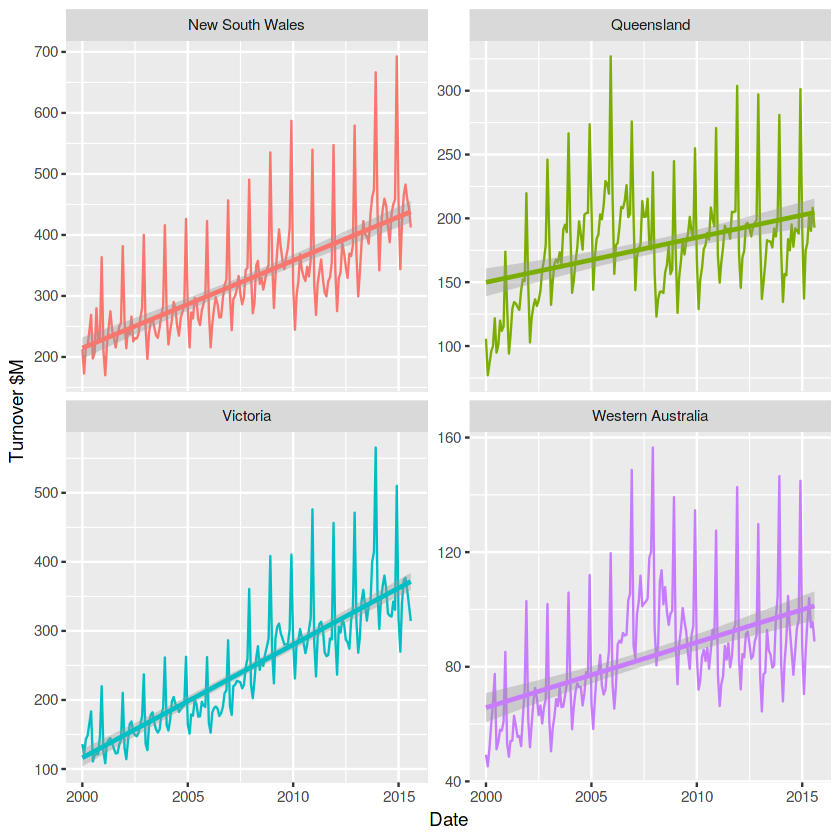

In [13]:
Historicaltrend <- ggplot(turnover, aes(x=Date, y= `Turnover $M`, color= State))+ 
  geom_line()+
  facet_wrap(~State, scales="free_y")+
  theme(legend.position = "none")+
  geom_smooth(method = 'lm')

Historicaltrend

Once again Victoria seems like the state with the most potential as it has the steepest upward curve. However, we can't really compare the industry trends between the states because they have a different number of people. People from different states might be consuming at different rates and population are growing at different rates. We need normalized them by dividing every data point by the associated population. This way we know how the per capita consumption is changing in each state and identify clearly in which state this industry is growing the fastest.


### Demographics Data

To get the per capita consumption we are going to clean and fliter the demographics data table.

In [14]:
#First we filter to only show data starting from the year 2000
demographics <- demographics %>%
  filter(Date >= as.Date('2000-01-01'))

head(demographics)

Date,Estimated Resident Population ; Male ; New South Wales ;,Estimated Resident Population ; Male ; Victoria ;,Estimated Resident Population ; Male ; Queensland ;,Estimated Resident Population ; Male ; South Australia ;,Estimated Resident Population ; Male ; Western Australia ;,Estimated Resident Population ; Male ; Tasmania ;,Estimated Resident Population ; Male ; Northern Territory ;,Estimated Resident Population ; Male ; Australian Capital Territory ;,Estimated Resident Population ; Male ; Australia ;,⋯,Estimated Resident Population ; Female ; Australia ;,Estimated Resident Population ; Persons ; New South Wales ;,Estimated Resident Population ; Persons ; Victoria ;,Estimated Resident Population ; Persons ; Queensland ;,Estimated Resident Population ; Persons ; South Australia ;,Estimated Resident Population ; Persons ; Western Australia ;,Estimated Resident Population ; Persons ; Tasmania ;,Estimated Resident Population ; Persons ; Northern Territory ;,Estimated Resident Population ; Persons ; Australian Capital Territory ;,Estimated Resident Population ; Persons ; Australia ;
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2000-03-01,3191864,2313086,1743975,739568,939331,233322,104200,156659,9423409,⋯,9563302,6431826,4695560,3497147,1496828,1874371,473303,198304,316731,18986711
2000-06-01,3199392,2317083,1749554,740009,941509,233229,104479,156815,9443465,⋯,9585337,6446558,4704065,3509458,1497503,1879093,473123,199149,317235,19028802
2000-09-01,3209563,2323973,1755949,740818,944729,233119,104771,157195,9471495,⋯,9614545,6465614,4718436,3523446,1498934,1886084,473035,199816,318079,19086040
2000-12-01,3218964,2329779,1762325,741358,947617,233190,104802,157515,9496927,⋯,9644109,6485081,4730855,3537670,1500129,1892531,473200,200045,318941,19141036
2001-03-01,3233305,2341511,1771031,742543,951846,233395,105137,158271,9538413,⋯,9686768,6513844,4753725,3556466,1502299,1901295,473662,200789,320526,19225181
2001-06-01,3241835,2345980,1777785,743153,954089,233388,105554,158666,9561826,⋯,9712875,6530349,4763615,3571469,1503461,1906274,473668,201743,321538,19274701


Pivot demographics table to a more machine friendly format

In [15]:
demographics <- pivot_longer(demographics, cols = starts_with("Estimate"), names_to = "State", values_to = "Population")

head(demographics)

Date,State,Population
<dttm>,<chr>,<dbl>
2000-03-01,Estimated Resident Population ; Male ; New South Wales ;,3191864
2000-03-01,Estimated Resident Population ; Male ; Victoria ;,2313086
2000-03-01,Estimated Resident Population ; Male ; Queensland ;,1743975
2000-03-01,Estimated Resident Population ; Male ; South Australia ;,739568
2000-03-01,Estimated Resident Population ; Male ; Western Australia ;,939331
2000-03-01,Estimated Resident Population ; Male ; Tasmania ;,233322


Seperate columns to make it easier to read

In [16]:
demographics <- separate(demographics, State, into = c('Estimate','Gender','State'), sep = ';')

demographics <- subset(demographics, select = -c(Estimate))

head(demographics)

Warning message:
“Expected 3 pieces. Additional pieces discarded in 1647 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


Date,Gender,State,Population
<dttm>,<chr>,<chr>,<dbl>
2000-03-01,Male,New South Wales,3191864
2000-03-01,Male,Victoria,2313086
2000-03-01,Male,Queensland,1743975
2000-03-01,Male,South Australia,739568
2000-03-01,Male,Western Australia,939331
2000-03-01,Male,Tasmania,233322


Filter to only show population for the four states of interest

In [17]:
demographics2 <- demographics %>%
  filter( State == c('Victoria', 'New South Wales', 'Queensland','South Australia'))

head(demographics2)

Warning message in State == c("Victoria", "New South Wales", "Queensland", "South Australia"):
“longer object length is not a multiple of shorter object length”


Date,Gender,State,Population
<dttm>,<chr>,<chr>,<dbl>


As you can see 0 rows are returned just like last time, again my workaround was to filter the data in Excel

In [18]:
# write.csv(demographics1, file = "C:\\Users\\username\\Documents\\folderr\\demographics.csv")

In Excel after I filtered the data to only show the four states of interest in the clothing retailing industry I uploaded the file

In [19]:
demographics <- read_xlsx("../input/forecasting-clothing-retail-industry/demographics.xlsx")


Now that both the demographics and turnover tables are clean I join dataframes

In [20]:
mergedt <- inner_join(turnover,demographics, by = NULL, copy = FALSE)

head(mergedt)

Joining, by = c("Date", "State")



Date,State,Industry,Turnover $M,Gender,Population
<dttm>,<chr>,<chr>,<dbl>,<chr>,<dbl>
2000-03-01,New South Wales,Clothing retailing,215.3,Male,3191864
2000-03-01,New South Wales,Clothing retailing,215.3,Female,3239962
2000-03-01,New South Wales,Clothing retailing,215.3,Persons,6431826
2001-03-01,New South Wales,Clothing retailing,218.2,Male,3233305
2001-03-01,New South Wales,Clothing retailing,218.2,Female,3280539
2001-03-01,New South Wales,Clothing retailing,218.2,Persons,6513844


Want to look at population as a whole so we filter out male and female population.

In [21]:
mergedt <- mergedt%>%
  filter(Gender == 'Persons')

head(mergedt)

Date,State,Industry,Turnover $M,Gender,Population
<dttm>,<chr>,<chr>,<dbl>,<chr>,<dbl>
2000-03-01,New South Wales,Clothing retailing,215.3,Persons,6431826
2001-03-01,New South Wales,Clothing retailing,218.2,Persons,6513844
2002-03-01,New South Wales,Clothing retailing,246.6,Persons,6575296
2003-03-01,New South Wales,Clothing retailing,238.5,Persons,6615712
2004-03-01,New South Wales,Clothing retailing,241.9,Persons,6648280
2005-03-01,New South Wales,Clothing retailing,272.8,Persons,6685875


To calculate sales per capita we divide turnover by population.


In [22]:
mergedt$Sales_per_capita <- (mergedt$`Turnover $M`/mergedt$Population)*1000000

head(mergedt)

Date,State,Industry,Turnover $M,Gender,Population,Sales_per_capita
<dttm>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
2000-03-01,New South Wales,Clothing retailing,215.3,Persons,6431826,33.47416
2001-03-01,New South Wales,Clothing retailing,218.2,Persons,6513844,33.49789
2002-03-01,New South Wales,Clothing retailing,246.6,Persons,6575296,37.50402
2003-03-01,New South Wales,Clothing retailing,238.5,Persons,6615712,36.05054
2004-03-01,New South Wales,Clothing retailing,241.9,Persons,6648280,36.38535
2005-03-01,New South Wales,Clothing retailing,272.8,Persons,6685875,40.80244


Now we can plot industry trends for each state based on its per capita consumption.

`geom_smooth()` using formula 'y ~ x'



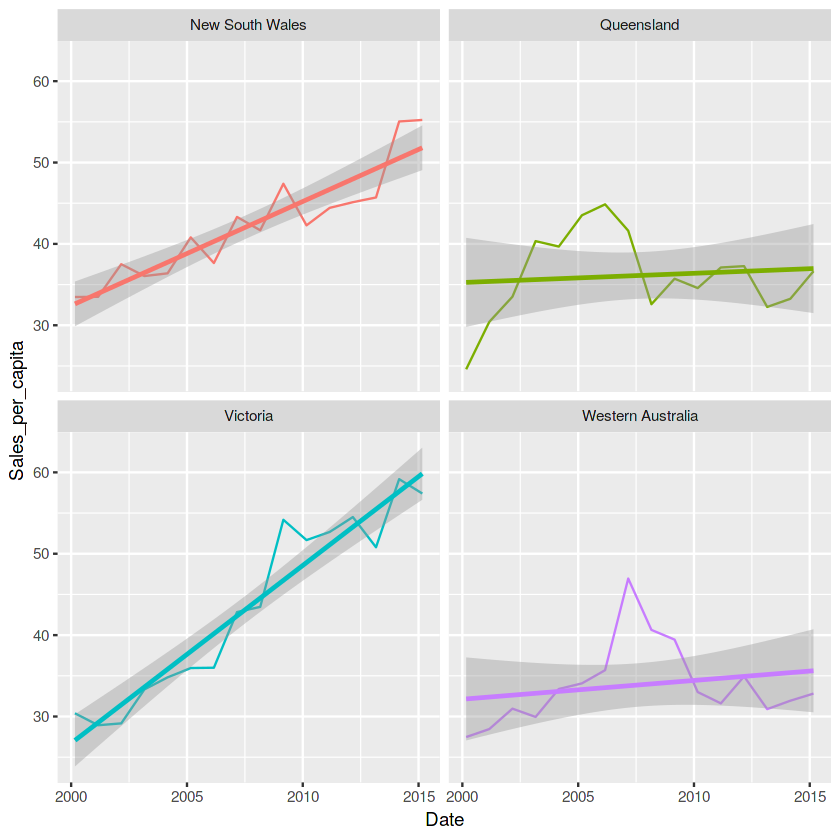

In [23]:
ggplot(mergedt, aes(x=Date, y= Sales_per_capita, color= State))+ 
  geom_line()+
  facet_wrap(~State)+
  theme(legend.position = "none")+
  geom_smooth(method = 'lm')

Once again in this analysis the state of Victoria come on top as its per capita consumption in the clothing retail industry is rapidly and constantly increasing when compared to Western Australia and Queensland.

### Final Recommendation

Based on the three analysis I would recommend to the board of directors to expand into the state of Victoria due to the following 3 reasons:

* Victoria had the best business enviroment as the boxplot is compact and closer to the top meaning that overall there is much certainty that the amount of Net Profit Margin % is going to be close to or higher of the Net Profit Margin % earned in New South Wales.
* Victoria had the highest industry turnover year by year
* Victoria had the highest per capita consumption meaning there is a growth in people's demands and their expenditure within this industry which is exactly what we're after.

To see final presentation on Tableau with forecast click [here](https://public.tableau.com/shared/2X39Y82HX?:display_count=y&:origin=viz_share_link)